In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Sample the quasi-uniform orientation for projection.
The orientation can be represented as the 3DEM Euler angle (phi, theta, psi).
Here, the convention of Euler angle is 3DEM convention, i.e. Z-Y'-Z'' convention.
As the "psi" don't change the information of the projection, we can only sample "phi" and "theta" for orientation sampling.
Two sampling methods are considered: P94 (Penczek et al., 1994) and SK97 (Saff and Kuijlaars, 1997).
For Euler angle convention and details of P94/SK97, refer to the following paper:
"P.R. Baldwin, Pawel A. Penczek. The Transform Class in SPARX and EMAN2. Journal of Structural Biology, 2007, 250-261"
For SK97 method, the above paper makes some estimation, the original method can be found in section "Spiral Points" of the following paper:
"E.B. Saff, A.B.J. Kuijlaars. Distributing Many Points on a Sphere. The Mathematical Intelligencer, 1997, 5-11"
For SK97, the delta_theta in the first paper should be 1/sqrt(N) in the second paper, and delta_cos_theta in the first paper is estimated.

In [2]:
def orientation_sampling(phi_range, theta_range, step_size, N, method):
    """
    sample the quasi-uniform orientation for projection, using P94 or SK97 method.
    :param phi_range: range of phi for sampling, in degree, restricted in [0, 360], only used for 'P94'. E.g. np.array([0, 360]).
    :param theta_range: range of theta for sampling, in degree, restricted in [0, 180], only used for 'P94'. E.g. np.array([0, 180]).
    :param step_size: step size for sampling, delta_theta in the paper, in degree, only used for 'P94'. E.g. 6.
    :param N: the total number of samples, positive integer, only used for 'SK97'. E.g. 1163.
    :param method: method for sampling, a string. Valid option: 'P94', 'SK97'.
    :return: dictionary of list of sampled phi and theta, in degree. E.g. {'phi': [], 'theta': []}
    """
    sampled_orientation = {}
    sampled_orientation['phi'] = []
    sampled_orientation['theta'] = []
    phi_min = phi_range[0]
    phi_max = phi_range[1]
    theta_min = theta_range[0]
    theta_max = theta_range[1]
    delta_theta = step_size

    if method == 'P94':
        theta_array = np.arange(theta_min, theta_max+0.1, delta_theta)  # '+0.1' is because np.arange does not include the 'stop value' itself
        for theta in theta_array:
            delta_phi = delta_theta / np.abs(np.sin(theta/180*np.pi))
            phi_array = np.arange(phi_min, phi_max+0.1, delta_phi)  # '+0.1' is because np.arange does not include the 'stop value' itself
            for phi in phi_array:
                sampled_orientation['phi'].append(phi)
                sampled_orientation['theta'].append(theta)
        return sampled_orientation

    elif method == 'SK97':  # Based on E.B. Saff and A.B.J. Kuijlaars' paper
        radius_phi_array = []
        radius_theta_array = []
        cos_theta_array = np.arange(-1, 1, 2/(N-1))
        cos_theta_array = np.append(cos_theta_array, 1)  # this is because np.arange does not include the 'stop value' itself
        for i in range(cos_theta_array.shape[0]):
            if i==0:
                theta = np.pi
                phi = 0
                radius_phi_array.append(phi)
                radius_theta_array.append(theta)
            elif i==N-1:
                theta = 0
                phi = 0
                radius_phi_array.append(phi)
                radius_theta_array.append(theta)
            else:
                theta = np.arccos(cos_theta_array[i])
                phi = (radius_phi_array[i-1] + 3.6/np.sqrt(N)/np.sin(theta)) % (2*np.pi)
                radius_phi_array.append(phi)
                radius_theta_array.append(theta)
        sampled_orientation['phi'] = list(np.array(radius_phi_array)/np.pi*180)
        sampled_orientation['theta'] = list(np.array(radius_theta_array)/np.pi*180)
        return sampled_orientation

    else:
        raise RuntimeError('invalid method assigned, valid option: P94, SK97')

Use method='P94' to sampling orientation

1163


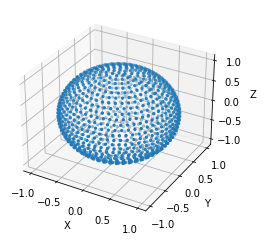

In [5]:
    phi_range = np.array([0, 360])
    theta_range = np.array([0.1, 180.1])  # if theta=0 or 180, then np.sin(theta)=0, thus can not be divided
    step_size = 6
    N = 1163
    method = 'P94'
    result = orientation_sampling(phi_range, theta_range, step_size, N, method)
    result_phi = np.array(result['phi'])
    result_theta = np.array(result['theta'])
    print(len(result['phi']))

    x = np.sin(result_theta/180*np.pi)*np.cos(result_phi/180*np.pi)
    y = np.sin(result_theta/180*np.pi)*np.sin(result_phi/180*np.pi)
    z = np.cos(result_theta/180*np.pi)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, s=5, c=None, depthshade=True)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.savefig('orientation_sampling_P94_step6')
    plt.show()

Use method=‘SK97’ to sampling orientation

1163


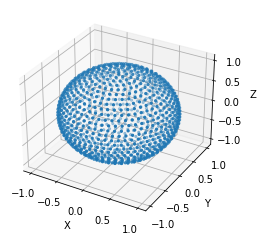

In [6]:
    phi_range = np.array([0, 360])
    theta_range = np.array([0.1, 180.1])  # if theta=0 or 180, then np.sin(theta)=0, thus can not be divided
    step_size = 6
    N = 1163
    method = 'SK97'
    result = orientation_sampling(phi_range, theta_range, step_size, N, method)
    result_phi = np.array(result['phi'])
    result_theta = np.array(result['theta'])
    print(len(result['phi']))

    x = np.sin(result_theta/180*np.pi)*np.cos(result_phi/180*np.pi)
    y = np.sin(result_theta/180*np.pi)*np.sin(result_phi/180*np.pi)
    z = np.cos(result_theta/180*np.pi)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, s=5, c=None, depthshade=True)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.savefig('orientation_sampling_SK97_N1163')
    plt.show()